In [31]:
import gzip
import csv

dbs_info={}
dbs_columns={}
with gzip.open('dbs_events_181022.csv.gz') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    n=0
    for row in reader:
        if n==0:
            for i,a in enumerate(row[1:]):
                dbs_columns[a]=i
        else:        
            dbs_info[row[0]]=tuple(row[1:])
        n=n+1
print("Done reading dbs info")

Done reading dbs info


In [33]:
# read phedex 
import gzip
import csv

phedex_columns= ['now_sec','dataset_name','dataset_id','dataset_is_open','create_time',
                'update_time','block_name','block_id','block_files','block_bytes',
                'block_is_open','block_time_create','block_time_update',
                'node_name','node_id','br_is_active','br_src_files',
                'br_src_bytes','br_dest_files','br_dest_bytes',
                'br_node_files','br_node_btyes','br_xfer_files',
                'br_xfer_bytes','br_is_custodial','br_user_group_id',
                'replica_time_create','replica_time_updater']
phedex_colmap={}
for i in range(len(phedex_columns)):
    phedex_colmap[phedex_columns[i]]=i

dataset_col=phedex_colmap['dataset_name']
site_col=phedex_colmap['node_name']
block_col=phedex_colmap['block_name']
replicaTime_col=phedex_colmap['replica_time_create']
size_col=phedex_colmap['block_bytes']
phedex_info={}
n=0
fmt='%Y-%m-%d'
import datetime
import numpy
sumBytes=0
cern_info={}
with gzip.open('phedex_det.txt.gz') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if 'MSS' not in row[site_col]: continue
        if 'CERN' not in row[site_col]: continue
        if row[dataset_col] in dbs_info:
            nfiles=dbs_info[row[dataset_col]]
        #key=(row[dataset_col],row[block_col],row[site_col])
            cern_info[row[dataset_col]]=nfiles
print("Done reading phedex info")
#print len(phedex_info)
#print sumBytes

Done reading phedex info
0
0


In [34]:
import numpy
vals_nf=[]
vals_size=[]
cern_nf=[]
for ds in dbs_info:
    if float(dbs_info[ds][0]) < 1459468800: continue #April 1, 2016
    vals_nf.append(int(dbs_info[ds][2]))
    vals_size.append(float(dbs_info[ds][1]))
    if int(dbs_info[ds][2])>1e7:
        if '/RAW' not in ds: print ds,dbs_info[ds],vals_size[-1]/float(vals_nf[-1])/1024./1024.,'MB per file'
        if '/RECO' not in ds: print ds,dbs_info[ds],vals_size[-1]/float(vals_nf[-1])/1024./1024.,'MB per file'

for ds in cern_info:
    cern_nf.append(int(cern_info[ds][2]))

cern_nf_np=numpy.array(cern_nf)
vals_nf_np=numpy.array(vals_nf)
vals_size_np=numpy.array(vals_size)

In [35]:
print len(vals_nf_np)
print numpy.max(vals_nf_np)

bins_nf=numpy.array([0,2.5,4.5,8.5,16.5,32.5,64.5,128.5,256.5,512.5,1024.5,2048.5,100000.5,1000000.5,70e6])
nf_hist=numpy.bincount(numpy.digitize(vals_nf_np,bins_nf))
cern_hist=numpy.bincount(numpy.digitize(cern_nf_np,bins_nf))
tot=len(vals_nf_np)
print len(bins_nf)
running=0
for i in range(len(bins_nf)-2):
    running+=nf_hist[i+1]
    print i,bins_nf[i],'-',bins_nf[i+1],':',nf_hist[i+1],running/float(tot)

    

361913
282603
15
0 0.0 - 2.5 : 137079 0.3787622992266097
1 2.5 - 4.5 : 38351 0.48472975549372366
2 4.5 - 8.5 : 37585 0.5885806809923932
3 8.5 - 16.5 : 38109 0.6938794682699986
4 16.5 - 32.5 : 35951 0.7932154965419866
5 32.5 - 64.5 : 25093 0.8625498393260259
6 64.5 - 128.5 : 17600 0.9111803112902824
7 128.5 - 256.5 : 11569 0.9431465573217873
8 256.5 - 512.5 : 7298 0.963311624616966
9 512.5 - 1024.5 : 4925 0.9769198674819639
10 1024.5 - 2048.5 : 3407 0.9863337321400447
11 2048.5 - 100000.5 : 4917 0.9999198702450589
12 100000.5 - 1000000.5 : 29 1.0


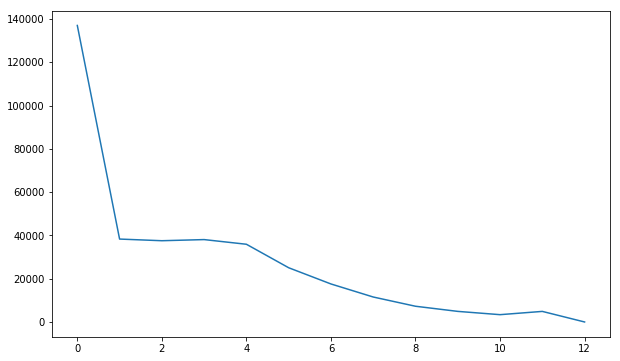

In [19]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 6
pylab.plot(nf_hist[1:])


361913.0 81124.42922374427
[0.00000000e+00 3.78762299e-01 1.05967456e-01 1.03850925e-01
 1.05298787e-01 9.93360283e-02 6.93343428e-02 4.86304720e-02
 3.19662460e-02 2.01650673e-02 1.36082429e-02 9.41386466e-03
 1.35861381e-02 8.01297549e-05]
[0.00000000e+00 3.99732716e-01 1.25327729e-01 1.22899728e-01
 9.20090183e-02 7.70431429e-02 5.70886425e-02 4.02456566e-02
 2.87381533e-02 1.86180794e-02 1.29867480e-02 8.81425788e-03
 1.64247166e-02 7.14118115e-05]
[0.26342081 0.18743404 0.13930908 0.11651305 0.10891437 0.0987828
 0.05825653 0.02026314 0.00506578 0.00204039]


([<matplotlib.axis.XTick at 0x11d376210>,
 <a list of 10 Text xticklabel objects>)

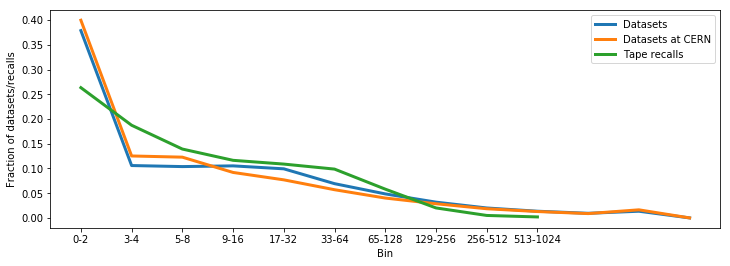

In [36]:
pylab.rcParams['figure.figsize'] = 12, 4

tape_recall_data_nfiles=numpy.array([21369.86301369863, 15205.479452054795, 11301.369863013699, 9452.054794520549, 8835.61643835616, 8013.698630136985, 4726.027397260271, 1643.8356164383551, 410.9589041095888, 165.52511415524816])

sum1=float(numpy.sum(nf_hist))
sum2=numpy.sum(tape_recall_data_nfiles)
sum3=float(numpy.sum(cern_hist))
print sum1,sum2
nf_hist=nf_hist/sum1
cern_hist=cern_hist/sum3
tape_recall_data_nfiles=tape_recall_data_nfiles/sum2
print nf_hist
print cern_hist
print tape_recall_data_nfiles
pylab.plot(nf_hist[1:],linewidth=3)
pylab.plot(cern_hist[1:],linewidth=3)
pylab.plot(tape_recall_data_nfiles,linewidth=3)
pylab.xlabel('Bin')
pylab.ylabel('Fraction of datasets/recalls')

pylab.legend(['Datasets','Datasets at CERN','Tape recalls'],loc='best')

#pylab.xticks( [0,1,2,3,4,5,6,7,8,9])
#pylab.yticks( numpy.arange(0,10))
pylab.xticks(numpy.arange(0,10), ('0-2','3-4','5-8','9-16','17-32','33-64','65-128','129-256','256-512','513-1024'))
#locs,labels=pylab.xticks()
#print locs
#print labels

Add filesize to the things I look at - this matters for reading
serpentine tape - LTO lacks traveling saleman style optimization that enterprise drives
can do families by path but miss a hook to do this automatically - can it be something that goes into FTS, or xroot or hook in tape system to call plugin? 

can i use fts monitor to optimize tape families - 10-20 

100 tape drives growing to 150-170 drives in Run 3 for Alice and LHCb (LTO-8) - but not expecting LTO-9 to be deployed at CERN for Run 3 - but new generation of IBM drives for ~400 GB/second would be expected




